Водопьян А.О. Хабибуллин Р.А. 2019 - 2022 г.

## Содержание:
* [1.1. Давление насыщения нефти газом](#Pb)
    * [1.1.1. Давление насыщения, корреляция Стендинга](#Pb_Standing)
    * [1.1.2. Давление насыщения, корреляция Валко Маккейна](#Pb_Valco)
* [1.2. Газосодержание](№Rs)
    * [1.2.1. Газосодержание, корреляция Стендинга](#Rs_Standing)
    * [1.2.2. Газосодержание, корреляция Веларде-Маккейна](#Rs_McCain)
    * [1.2.3. Оценка объема растворенного газа в сепараторе, для уточнения газосодержания по замерам на сепараторе. Корреляция Маккейна.](#Rsb_McCain)



## 1.1. Давление насыщения нефти газом
<a id="Pb"></a>

### 1.1.1. Давление насыщения, корреляция Стендинга
<a id="Pb_Standing"></a>

Корреляция Стендинга \ref{1} для оценки давления насыщения нефти газом. 

$$ P_b =  0.5197  \left( \frac{R_{sb}}{\gamma_g}\right)^{0.83} 10 ^{y_g} \tag{1.1.1.1} $$

где

$P_b$ - давление насыщения, $МПа$ 

$R_{sb}$ - газосодержание при давлении насыщения, $м^3/м^3 $

$\gamma_g$ - относительная плотность газа (по воздуху), безразмерная величина  

$y_g$ - мольная доля газа, $ y_g = 1.225 +0.00164 T - \frac{ 1.769}{\gamma_o}$

$\gamma_o$ - относительная плотность нефти (по воде), безразмерная величина  

$ T $ - температура, $ ^{\circ}\mathrm{K}$

Корреляции Standing базируются на 105 экспериментально определенных давлениях насыщения нефтяных систем Калифорнии. Диапазоны значений основных свойств, использованных для разработки данной корреляции, приведены в таблице ниже. 

| <p align="left"> Параметр  | Диапазон |
| :--- | :--- |
| <p align="left"> давление насыщения,$P_b$ , $ МПа $  | 0.896…48.263  |
| <p align="left"> температура, $^{\circ}\mathrm{K} $ | 310…400 |
| <p align="left"> газосодержание при давлении насыщения, $R_{sb}$ , $м^3/м^3 $ | 3.6…254 |
| <p align="left"> относительная плотность нефти по воде, $\gamma_o$ | 0.725…0.956  |
| <p align="left"> относительная плотность газа, $\gamma_g$  | 0.59…0.95  |


 
 
ref "A Pressure-Volume-Temperature Correlation for Mixtures of California Oil and Gases", M.B. Standing, Drill. & Prod. Prac., API, 1947.

In [1]:
import sys 
sys.path.append('..')
import neftpy.upvt as pvt

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import *
init_printing()

In [3]:
# Корреляция Стендинга для давления насыщения реализована 
# в виде функции unf_pb_Standing_MPaa в модуле neftpy.upvt

pvt.unf_pb_Standing_MPaa(rsb_m3m3=100,  gamma_oil=0.86, gamma_gas=0.6, t_K=350)

array(20.1702107)

в приведеном коде использована коррекция значений давления насыщения при низких значениях газосодержания при давлении насыщения для обеспечения выхода на значение $P_b = 1$ при $R{sb} = 0$


<img  src="pics/Pb-Standing_comparison.png" width="600"  >

In [4]:
# параметры определяющие диапазоны значений для построения графиков
rsb_set=np.arange(1,300,10)

t_set=np.arange(273,380,30)
t_set_def=np.array([313])

gg_set=np.arange(0.6,1,0.1)
gg_set_def=np.array([0.8])

go_set=np.arange(0.8,1,0.05)
go_set_def=np.array([0.86])

# функция настройки графиков по давлению насыщения от газосодержания
def plot_pb_rsb(plt, func, 
                tset, goset, ggset, 
                plot_title, plot_xlab, plot_ylab):
    for t in tset:
        for gg in ggset:
            for go in goset:            
                plt.plot(rsb_set, 
                         func(rsb_set,t_K = t,gamma_gas = gg,gamma_oil = go), 
                         label='t = %1.0f $ ^{\circ}\mathrm{K}$'%t +
                                    ' $\gamma_g$ = %1.2f'%gg + 
                                    ' $\gamma_o$ = %1.2f'%go
                        )
    plt.title(plot_title)
    plt.ylabel(plot_ylab, color = 'black')
    plt.xlabel(plot_xlab, color = 'black')
    plt.legend()

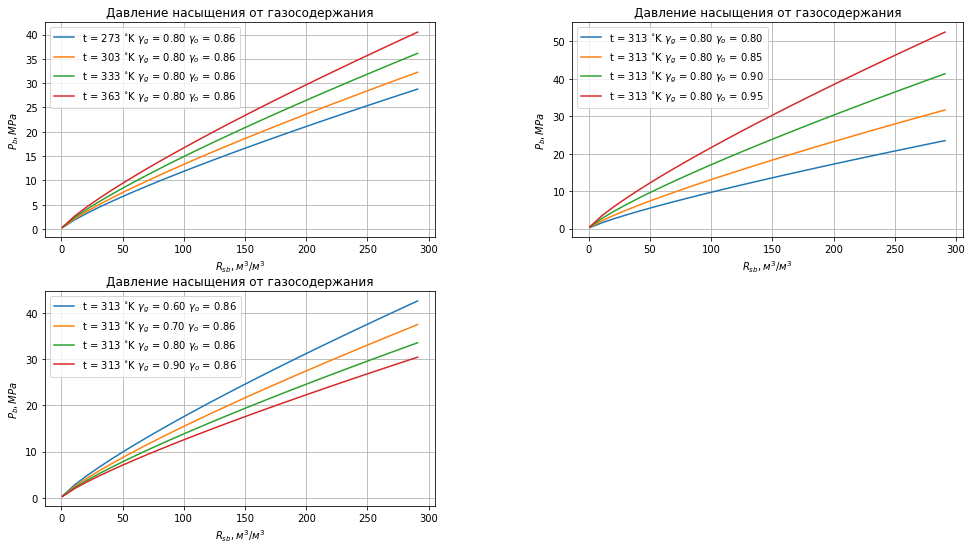

In [5]:
# код для построения графиков
plt.figure(figsize=(15, 8))
# рисуем первый график
plt.subplot(221)
plot_pb_rsb(plt, pvt.unf_pb_Standing_MPaa, 
            t_set, go_set_def, gg_set_def,
           'Давление насыщения от газосодержания',
           '$R_{sb}, м^3/м^3$',
           '$P_b, MPa$')
plt.grid()
# рисуем второй график
plt.subplot(222)
plot_pb_rsb(plt, pvt.unf_pb_Standing_MPaa, 
            t_set_def, go_set, gg_set_def,
            'Давление насыщения от газосодержания',
            '$R_{sb}, м^3/м^3$',
            '$P_b, MPa$')
plt.grid()
# рисуем третий график
plt.subplot(223)
plot_pb_rsb(plt, pvt.unf_pb_Standing_MPaa, 
            t_set_def, go_set_def, gg_set,
            'Давление насыщения от газосодержания',
            '$R_{sb}, м^3/м^3$',
            '$P_b, MPa$')

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25, wspace=0.35)
# рисуем все
plt.grid()
plt.show()

---

### 1.1.2. Давление насыщения, корреляция Valko McCain <a id="Pb_Valco"></a>


Корреляция Valco McCain (2003) для оценки давления насыщения нефти газом разработана на основе банка данных нефтей со всего мира. На рисунке показаны источники данных, которые были использованы авторами для настройки корреляции.  

<img  src="pics/McCain_corr_sources.png" width="400"  >


Диапазоны значений основных свойств (1745 значений), использованных для разработки данной корреляции, приведены в таблице ниже. 

| <p align="left"> Параметр  | Мин|Среднее|Макс|
| :--- | :---: |:---:|:---:|
| <p align="left"> давление насыщения,$P_b$ , $ МПа $  | 0.55  |15.0|45.5|
| <p align="left"> температура, $^{\circ}\mathrm{С} $ | 15 |85|172|
| <p align="left"> газосодержание при давлении насыщения, $R_{sb}$ , $м^3/м^3 $ | 2 |104|395|
| <p align="left"> относительная плотность нефти по воде, $\gamma_o$ | 0.724  |0.846|1.02|
| <p align="left"> относительная плотность газа на сепараторе, $\gamma_g$  | 0.555  |0.838|1.685|
    
По результатам сравнений с замеренными значениями абсолютная значение средней относительной ошибки (AARE) для корреляции составляет около 11%. Авторы отмечают, что полученная точность соответствует точности замеров использованных для построения корреляции и для построения более точных зависимостей потребуется сбор новых данных с повышенной точностью.

$$
ln P_b = 7.475 + 0.713 z + 0.0075 z^2 \tag{1.1.2.1}
$$
где 

$$
z = z_1 + z_2 + z_3 + z_4
$$
$$
z_1 = -5.48 - 0.0375\cdot ln R_{sb}+0.281\cdot (ln R_{sb})^2 - 0.0206\cdot (ln R_{sb})^3
$$
$$
z_2 = 1.27 - 0.0449\cdot API +4.36 \cdot 10^{-4} API^2 -4.76 \cdot 10^{-6} API^3
$$
$$
z_3 = 4.51 - 10.84 \cdot \gamma_{gSP} +8.39\cdot \gamma_{gSP}^2 -2.34\cdot \gamma_{gSP}^3
$$
$$
z_4 = -0.7835 + 6.23 \cdot 10^{-3} \cdot T_R - 1.22 \cdot 10^{-5} \cdot T_R^2+ 1.03 \cdot 10^{-8} \cdot T_R^3
$$

где

* $P_b$ - давление насыщения, $psia$
* $R_{sb}$ - газосодержание при давлении насыщения, ${scf}/{STB}$
* $\gamma_{gSP}$ - удельная плотность газа, отобранного на сепараторе, безразмерная величина
* $T_R$ - пластовая температура, $F$


ref Reservoir oil bubblepoint pressures revisited; solution gas-oil ratios and surface gas specific gravities. P.P.Valko, W.D.McCain Jr. Journal of petroleum science and engineering 37(2003) 153-169

---
#### Пребразование единиц измерения для корреляции Валко Маккейна

In [6]:
# объявления переменных необходимых для преобразования единиц в вырожении
rsb_scfSTB, rsb_m3m3 = symbols('R_sb[scfSTB] R_sb[m3m3]')
API, gamma_o = symbols('API gamma_o')
gamma_gSP = symbols('gamma_gSP')
T_RF,T_RK = symbols('T_R[F] T_R[K]')
z,z1,z2,z3,z4 = symbols('z,z1,z2,z3,z4')
p_bpsia, p_bMPaa = symbols('p_b[psia],p_b[MPaa]')

In [7]:
# определение алгоритма расчета в американских промысловых единицах
eq1 = Eq(z,z1+z2+z3+z4)
eq2 = Eq(z1,  -5.48 - 0.03758 * ln(rsb_scfSTB)+ 0.281*  ln(rsb_scfSTB)**2 - 0.0206* ln(rsb_scfSTB)**3)
eq3 = Eq(z2,  1.27 - 0.0449* API +4.36 * 10**-4 *API**2 -4.76 * 10**-6 *API**3)
eq4 = Eq(z3,  4.51- 10.84 *gamma_gSP +8.39*gamma_gSP**2 -2.34*gamma_gSP**3 )
eq5 = Eq(z4,  -0.7835 + 6.23 * 10**-3 * T_RF - 1.22 * 10**-5 * T_RF**2+ 1.03 * 10**-8 * T_RF**3)
eq6 =Eq(ln(p_bpsia),(7.475 + 0.713 * z + 0.0075 * z**2))
# покажем выражения в печатном виде
display(eq6)
display(eq1)
display(eq2)
display(eq3)
display(eq4)
display(eq5)

In [8]:
# выражения для преобразования единиц измерения из американских промысловых в практические метрические
scfSTB_to_m3m3 = rsb_m3m3/0.178107606679035
API_to_gamma_o = 141.5/gamma_o-131.5
F_to_K = T_RK*9/5-459.67
psi_to_MPa = p_bMPaa * 14.6959 * 10.1325
# покажем выражения в печатном виде
display(Eq(rsb_scfSTB , scfSTB_to_m3m3))
display(Eq(API,API_to_gamma_o))
display(Eq(T_RF,F_to_K))
display(Eq(p_bpsia,psi_to_MPa))

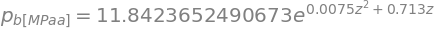

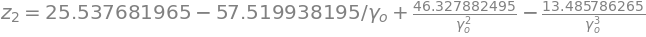

In [9]:
# преобразование алгоритма в метрические единицы с использованием символьных вычислений
eq2_m=simplify(eq2.subs(rsb_scfSTB,scfSTB_to_m3m3))
eq3_m=simplify(eq3.subs(API,API_to_gamma_o))
eq5_m=simplify(eq5.subs(T_RF,F_to_K))
eq6_m=eq6.subs(p_bpsia, psi_to_MPa)
eq8=solve(eq6_m,p_bMPaa)
eq9=Eq(p_bMPaa, eq8[0])
# вывод результатов преобразований
display(eq9)
display(eq1)
display(eq2_m)
display(eq3_m)
display(eq4)
display(eq5_m)

In [10]:
pvt.unf_pb_Valko_MPaa(rsb_m3m3 = 100, gamma_oil=0.86, gamma_gas=0.6, t_K=350)

array(23.29991481)

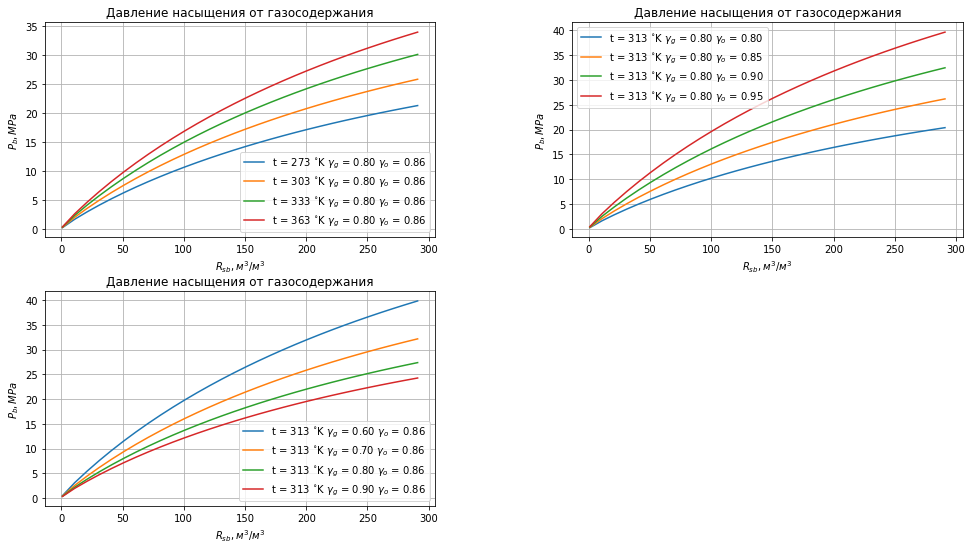

In [11]:
plt.figure(figsize=(15,8))
f = pvt.unf_pb_Valko_MPaa
# рисуем первый график
plt.subplot(221)
plot_pb_rsb(plt, pvt.unf_pb_Valko_MPaa, 
            t_set,go_set_def,gg_set_def,
            'Давление насыщения от газосодержания',
            '$R_{sb}, м^3/м^3$',
            '$P_b, MPa$')
plt.grid()
# рисуем второй график
plt.subplot(222)
plot_pb_rsb(plt, pvt.unf_pb_Valko_MPaa, 
            t_set_def,go_set,gg_set_def,
            'Давление насыщения от газосодержания',
            '$R_{sb}, м^3/м^3$',
            '$P_b, MPa$')
plt.grid()
# рисуем третий график
plt.subplot(223)
plot_pb_rsb(plt, pvt.unf_pb_Valko_MPaa, 
            t_set_def,go_set_def,gg_set,
            'Давление насыщения от газосодержания',
            '$R_{sb}, м^3/м^3$',
            '$P_b, MPa$')

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25, wspace=0.35)
# рисуем все
plt.grid()
plt.show()

в приведеном коде использована коррекция значений давления насыщения при низких значениях газосодержания при давлении насыщения для обеспечения выхода на значение $P_b = 1$ при $R{sb} = 0$ и при больших значениях газосодержания

<img  src="pics/Pb-Valko_comparison.png" width="600"  >

следует отметить, что в отличии от корреляций типа Стендинга корреляция Валко Макейна хорошо описывает исходный набор данных в пределах области применимости, но дает нефизичные результаты за пределами диапазона применимости. Приведенная в коде корректировке может частично сгладить экспраполированные значения, но лучше при проведении расчетов контролировать, чтобы корреляция применялась в пределах диапазона примемости. 

## <a id="Rs"></a> 1.2. Газосодержание


Газосодержание $R_s$ - содержание растворенного газа в нефти при заданных термобарических условиях (solution gas ratio). Определяется как отношение объема газа выделившегося из нефти при приведении ее к стандартным условиям к объему оставшейся нефти в стандартных условиях 

### <a id="Rs_Standing"></a> 1.2.1 Газосодержание, корреляция Стендинга


Для расчета газосодержания используется корреляция, обратная корреляции Стендинга (1.1.1.1) для давления насыщения нефти газом. 

$$ R_s =  \gamma_g  \left( \frac{1.92 p}{\ 10^{y_g}}\right)^{1.204} \tag{1.2.1.1} $$

где:

$R_s$ - газосодержание, $м^3/м^3 $

$P$ - давление, $МПа$ 

$\gamma_g$ - относительная плотность газа, безразмерная величина  

$y_g$ - мольная доля газа, $ y_g = 1.225 +0.00164 T - \frac{ 1.769}{\gamma_o}$

$\gamma_o$ - относительная плотность нефти, безразмерная величина  

$ T $ - температура, $ ^{\circ}\mathrm{K}$

Газосодержание является одним из ключевых свойств нефти при расчётах производительности скважин и работы скважинного оборудования. Динамика изменения газосодержания во многом определяет количество свободного газа в потоке и должна учитываться при проведении расчётов.

Если известно газосодержание при давлении насыщения, то газосодержание при давлениях ниже давления насыщения может быть получено из пропорции:

$$ R_s =  \ R_{sb}\left( \frac{P}{\ P_b}\right)^{1.204} \tag{1.2.1.2} $$

где:

$R_s$ - газосодержание, $м^3/м^3 $

$P$ - давление, $МПа$ 

$P_b$ - давление насыщения, $МПа$

$R_{sb}$ - газосодержание при давлении насыщения, $м^3/м^3 $

Корреляции Standing базируются на 105 экспериментально определенных давлениях насыщения нефтяных систем Калифорнии. Диапазоны значений основных свойств, использованных для разработки данной корреляции, приведены в таблице ниже. 

| <p align="left"> Параметр  | Диапазон |
| :--- | :--- |
| <p align="left"> давление насыщения,$P_b$ , $ МПа $  | 0.896…48.263  |
| <p align="left"> температура, $^{\circ}\mathrm{K} $ | 310…400 |
| <p align="left"> газосодержание при давлении насыщения, $R_{sb}$ , $м^3/м^3 $ | 3.6…254 |
| <p align="left"> относительная плотность нефти по воде, $\gamma_o$ | 0.725…0.956  |
| <p align="left"> относительная плотность газа, $\gamma_g$  | 0.59…0.95  |


ref "A Pressure-Volume-Temperature Correlation for Mixtures of California Oil and Gases", M.B. Standing, Drill. & Prod. Prac., API, 1947.

In [12]:
pvt.unf_rs_Standing_m3m3(p_MPaa=3, pb_MPaa=10, rsb_m3m3=130, gamma_oil=0.86, gamma_gas=0.6, t_K=350)

array(30.50684834)

In [13]:
# параметры определяющие диапазоны значений для построения графиков
p_set=np.linspace(0.11,11,100)
t_set=np.arange(294,400,30)
t_set_def=np.array([313])
gg_set=np.arange(0.6,1,0.1)
gg_set_def=np.array([0.8])
go_set=np.arange(0.8,1,0.05)
go_set_def=np.array([0.86])
# функция для автоматизации построения графиков по давлению насыщения
def plot_rs_p(plt, func, 
              tset, goset, ggset,
              plot_title, plot_xlab, plot_ylab):
    for t in tset:
        for gg in ggset:
            for go in goset:
                plt.plot(p_set, func(p_set, t_K = t, gamma_gas = gg, gamma_oil = go), 
                         label='t = %1.0f $ ^{\circ}\mathrm{K}$'%t +
                               ' $\gamma_g$ = %1.2f'%gg + 
                               ' $\gamma_o$ = %1.2f'%go
                        )
    plt.title(plot_title)
    plt.ylabel(plot_ylab, color = 'black')
    plt.xlabel(plot_xlab, color = 'black')
    plt.legend()

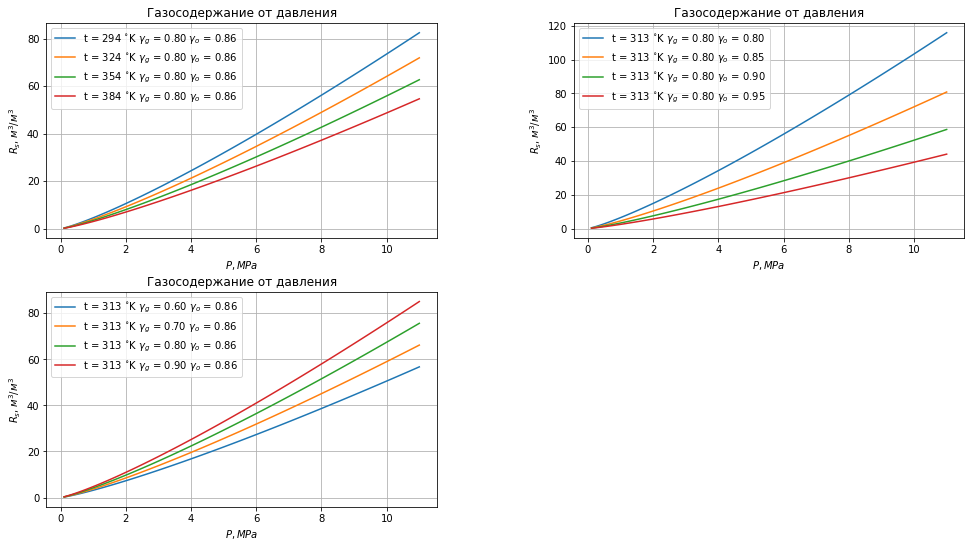

In [14]:
# код для построения графиков
plt.figure(figsize=(15,8))
f = pvt.unf_rs_Standing_m3m3
# рисуем первый график
plt.subplot(221)
plot_rs_p(plt, pvt.unf_rs_Standing_m3m3,
          t_set,go_set_def,gg_set_def,
          'Газосодержание от давления',
          '$P, MPa$',
          '$R_s, м^3/м^3$')
plt.grid()
# рисуем второй график
plt.subplot(222)
plot_rs_p(plt, pvt.unf_rs_Standing_m3m3,
          t_set_def,go_set,gg_set_def,
              'Газосодержание от давления',
               '$P, MPa$',
               '$R_s, м^3/м^3$')
plt.grid()
# рисуем третий график
plt.subplot(223)
plot_rs_p(plt, pvt.unf_rs_Standing_m3m3,
          t_set_def,go_set_def,gg_set,
              'Газосодержание от давления',
               '$P, MPa$',
               '$R_s, м^3/м^3$')

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25, wspace=0.35)
# рисуем все
plt.grid()
plt.show()

### <a id="Rs_McCain"></a> 1.2.2. Газосодержание, корреляция Веларде-Маккейна

Корреляция Веларде-Маккейна (1999) для газосодержания базируется на 718 лабораторных исследованиях разгазирования различных нефтей со всего мира.

$$ R_s = R_{sb}R_{sr}  \tag{1.2.2.1} $$

где:

$R_s$ - газосодержание, $м^3/м^3$

$R_{sb}$ - газосодержание при давлении насыщения, $м^3/м^3$

$R_{sr}$ - приведенное газосодержание

$$R_{sr}=a_1p_r^{a_2} + (1-a_1)P_r^{a_3} \tag{1.2.2.2}$$

где $P_r$ - степень превышения давления, $psig/psig$

$$P_r=\dfrac{(P-14,7)}{(P_b-14,7)} \tag{1.2.2.3} $$ 

$P$ - давление, psia

$P_b$ - давление насыщения, psia

$$a_1=9.73 \cdot 10^{-7}\gamma_{gSP}^{1.672608}API^{0.929870}T^{0.247235}(P_b-14.7)^{1.056052}  \tag{1.2.2.4}$$

$$a_2=0.022339 \gamma_{gSP}^{-1.004750}API^{0.337711}T^{0.132795}(P_b-14.7)^{0.302065} \tag{1.2.2.5}$$

$$a_3=0.725167 \gamma_{gSP}^{-1.485480}API^{-0.164741}T^{-0.091330}(P_b-14.7)^{0.047094} \tag{1.2.2.6}$$

где в свою очередь

$\gamma_{gSP}$ - относительная плотность газа на сепараторе

$API$ - плотность нефти в градусах API 

$T$ - температура, F


В приведенной таблице представлены диапазоны значений использованных для создания корреляции:

| <p align="left"> Параметр  | Мин|Среднее|Макс|
| :--- | :---: |:---:|:---:|
| <p align="left"> давление насыщения,$P_b$ , $ МПа $  | 2.861  |15.706|53.434|
| <p align="left"> температура, $^{\circ}\mathrm{С} $ | 21 |86|160|
| <p align="left"> относительная плотность газа на сепараторе, $\gamma_g$  | 0.555  |0.793|1.472|
| <p align="left"> объемный коэффициент нефти при давлении насыщения, $B_{ob}$ , $ м^3/м^3 $ | 1.012  |1.358|2.042|

>"Correlation of Black Oil Properties at Pressures Below Bubblepoint Pressure—A New Approach",
    J. VELARDE, T.A. BLASINGAME Texas A&M University, W.D. MCCAIN, JR. S.A. Holditch & Associates, Inc 1999

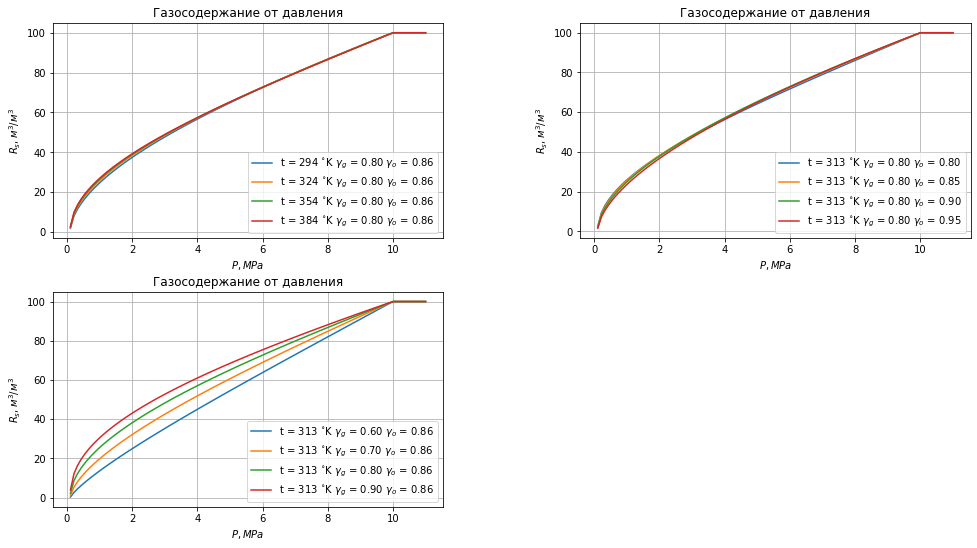

In [15]:
# код для построения графиков
plt.figure(figsize=(15,8))
f = pvt.unf_rs_Velarde_m3m3
# рисуем первый график
plt.subplot(221)
plt.grid()
plot_rs_p(plt, pvt.unf_rs_Velarde_m3m3,
          t_set,go_set_def,gg_set_def,
              'Газосодержание от давления',
               '$P, MPa$',
               '$R_s, м^3/м^3$')
# рисуем второй график
plt.subplot(222)
plt.grid()
plot_rs_p(plt, pvt.unf_rs_Velarde_m3m3,
          t_set_def,go_set,gg_set_def,
              'Газосодержание от давления',
               '$P, MPa$',
               '$R_s, м^3/м^3$')
# рисуем третий график
plt.subplot(223)
plot_rs_p(plt, pvt.unf_rs_Velarde_m3m3,
          t_set_def,go_set_def,gg_set,
              'Газосодержание от давления',
               '$P, MPa$',
               '$R_s, м^3/м^3$')

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25, wspace=0.35)
# рисуем все
plt.grid()
plt.show()

### <a id="Rsb_McCain"></a>  1.2.3. Оценка объема растворенного газа в сепараторе, для уточнения газосодержания по замерам на сепараторе. Корреляция Маккейна.


Во многих корреляциях используется в качестве исходного параметра - газосодержание при давлении насыщения. Значение этого параметра может быть получено с помощью полевых данных как сумма отделяемого газового фактора в сепараторе и резервуаре для товарной нефти.


$$ R_{sb} = R_{sp} + R_{st}  \tag{1.2.3.1} $$

где:

$R_{sb}$ - газосодержание при давлении насыщения, $м^3/м^3$

$R_{sp}$ - газовый фактор, отделяемый в сепараторе, $м^3/м^3$

$R_{st}$ -  газовый фактор в резервуаре для товарной нефти, $м^3/м^3$

Данное уравнение справедливо только если пластовое давление выше давления насыщения.

---
<img  src="pics/McCain_Rsb with stock tank and separator.jpg" width="600"  >

Расход газа и дебит нефти в сепараторе обычно измеряются, когда как в резервуаре газ обычно выпускается и не замеряется. Поэтому для более точной оценки газосодержания пластовой нефти при давлении насыщения необходимо оценить газовый фактор в резервуаре.
Таким образом, был разработана формула на основе GRACE-алгоритма на базе 898 исследований пластового флюида. В таблице приведены набор данных для исследования.

<img  src="pics/McCain_Rsb with stock tank and separator_data.jpg" width="600"  >

$$ ln R_{st} = 3.955 + 0.83z - 0.024z^2 + 0.075z^3  \tag{1.2.3.2} $$

где 

$$ z =\sum_{n=1}^3 z_n $$

$$ z_n = C0_n + C1_nV_n + C2_nV_n^2 $$

| <p align="left"> $n$  | $V$|$CO$|$C1$|$C2$|
| :--- | :---: |:---:|:---:|:---:|
| <p align="left"> $1$  | $ln P_{sp} $ |$-8.005$| $2.7$|$-0.161$|
| <p align="left"> $2$  | $ln T_{sp}$  |$1.224$|$-0.5$|$0$|
| <p align="left"> $3$ | $API$  |$-1.587$|$0.0441$|$-2.29 \cdot  10 ^{-5}$|
    
$T_{sp}$  - температура на сепараторе,  °F
    
$P_{sp}$  - давление на сепаратора, psia

Выражение для вычисления газового фактора в резервуаре требует знать температуру и давление в сепараторе, которые обычно не всегда бывают известны. Поэтому в этом случае можно использовать следующее уравнение.

$$ R_{sb} = 1.1618 R_{sp}   \tag{1.2.3.3}  $$
    
> "Reservoir oil bubblepoint pressures revisited; solution gas–oil ratios and surface gas specific gravities",
    J. VELARDE, W.D. MCCAIN, 2002

In [16]:
# параметры определяющие диапазоны значений для построения графиков
p_set=np.arange(1,11,0.25)
t_set=np.arange(294,400,30)
t_set_def=np.array([313])
go_set=np.arange(0.8,1,0.05)
go_set_def=np.array([0.86])
r_sp = 50
# функция для автоматизации построения графиков по давлению насыщения
def plot_rsb_psep(plt,func,
                  tset, goset,
                  plot_title, plot_xlab, plot_ylab):
    for t in tset:
            for go in goset:
                plt.plot(p_set, func(r_sp,go,p_set,t), 
                         label='t = %1.0f $ ^{\circ}\mathrm{K}$'%t +
                                                  ' $\gamma_o$ = %1.2f'%go)
    plt.title(plot_title)
    plt.ylabel(plot_ylab, color = 'black')
    plt.xlabel(plot_xlab, color = 'black')
    plt.legend()

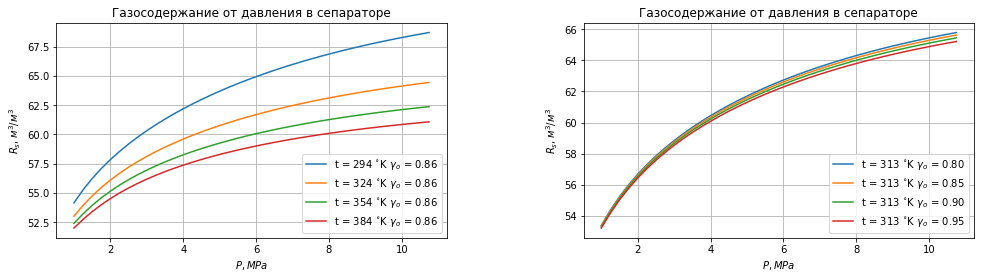

In [17]:
# код для построения графиков
plt.figure(figsize=(15,8))
f = pvt.unf_rsb_Mccain_m3m3
# рисуем первый график
plt.subplot(221)
plt.grid()
plot_rsb_psep(plt, f,
              t_set, go_set_def,
              'Газосодержание от давления в сепараторе',
              '$P, MPa$',
              '$R_s, м^3/м^3$')
# рисуем второй график
plt.subplot(222)
plt.grid()
plot_rsb_psep(plt, f,
              t_set_def,go_set,
              'Газосодержание от давления в сепараторе',
              '$P, MPa$',
              '$R_s, м^3/м^3$')

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25, wspace=0.35)
# рисуем все
plt.show()

# Список литературы

1. "A Pressure-Volume-Temperature Correlation for Mixtures of California Oil and Gases", M.B. Standing, Drill. & Prod. Prac., API, 1947.
2. "Correlation of Black Oil Properties at Pressures Below Bubblepoint Pressure—A New Approach",
    J. VELARDE, T.A. BLASINGAME Texas A&M University, W.D. MCCAIN, JR. S.A. Holditch & Associates, Inc 1999
3. "Reservoir oil bubblepoint pressures revisited; solution gas–oil ratios and surface gas specific gravities",
    J. VELARDE, W.D. MCCAIN, 2002